In [1]:
import pandas as pd

df = pd.read_excel('nutrient-file-release2-jan22.xlsx', sheet_name=1)
df

,Public Food Key,Classification,Food Name,"Energy with dietary fibre, equated \n(kJ)","Energy, without dietary fibre, equated \n(kJ)",Moisture (water) \n(g),Protein \n(g),Nitrogen \n(g),"Fat, total \n(g)",Ash \n(g),...,Leucine \n(mg),Lysine \n(mg),Methionine \n(mg),Phenylalanine \n(mg),Proline \n(mg),Serine \n(mg),Threonine \n(mg),Tyrosine \n(mg),Tryptophan \n(mg),Valine \n(mg)
0,F002258,31302.0,"Cardamom seed, dried, ground",1236,1012,8.3,10.8,1.72,6.7,5.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,155,NaN
1,F002893,31302.0,"Chilli (chili), dried, ground",1280,1002,10.8,13.4,2.14,14.3,11.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69,NaN
2,F002963,31302.0,"Cinnamon, dried, ground",1004,579,10.6,4.0,0.64,1.2,3.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49,NaN
3,F002970,31302.0,"Cloves, dried, ground",1389,1118,9.9,6.0,0.96,13.0,5.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30,NaN
4,F003190,31302.0,"Coriander seed, dried, ground",1344,1009,8.9,12.4,1.98,17.8,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,178,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1611,F009774,24702.0,"Zucchini, green skin, fresh, unpeeled, fried, ...",92,80,92.6,1.3,0.20,0.4,0.6,...,62.0,58.0,16.0,38.0,32.0,81.0,39.0,28.0,14,53.0
1612,F009773,24702.0,"Zucchini, green skin, fresh, unpeeled, boiled,...",77,66,93.8,1.1,0.17,0.4,0.5,...,52.0,48.0,13.0,31.0,26.0,67.0,33.0,24.0,12,44.0
1613,F009766,24702.0,"Zucchini, golden, fresh, unpeeled, raw",78,70,94.1,2.2,0.35,0.3,0.6,...,106.0,100.0,27.0,64.0,54.0,138.0,67.0,48.0,25,91.0
1614,F009765,24702.0,"Zucchini, golden, fresh, unpeeled, fried, no a...",111,100,91.6,3.1,0.50,0.4,0.8,...,152.0,142.0,38.0,92.0,77.0,198.0,96.0,69.0,35,130.0


In [2]:
import pandas as pd
import re
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings("ignore")

def general_pre_process(df: pd.DataFrame):
    df.columns = [re.sub(r'\s*\(.*', '', text) for text in df.columns]
    df = df.iloc[:, ~df.columns.duplicated(keep='first')]

    df = df.drop(['Public Food Key', 'Classification', 'Food Name',
                  'Energy, without dietary fibre, equated',
                  'Protein', 'Fat, total', 'Total dietary fibre',
                  'Available carbohydrate, without sugar alcohols',
                  'Available carbohydrate, with sugar alcohols'], axis=1)

    scaler = MinMaxScaler(feature_range=(0, 1))
    df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns) 

    return df

df = general_pre_process(df)
df

,"Energy with dietary fibre, equated",Moisture,Nitrogen,Ash,Alcohol,Fructose,Glucose,Sucrose,Maltose,Lactose,...,Leucine,Lysine,Methionine,Phenylalanine,Proline,Serine,Threonine,Tyrosine,Tryptophan,Valine
0,0.333783,0.083,0.113158,0.058116,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.629371,NaN
1,0.345666,0.108,0.140789,0.118236,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.223776,NaN
2,0.271132,0.106,0.042105,0.036072,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.538462,NaN
3,0.375101,0.099,0.063158,0.056112,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.216783,NaN
4,0.362949,0.089,0.130263,0.060120,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.629371,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1611,0.024845,0.926,0.013158,0.006012,0.0,0.0325,0.030726,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1612,0.020794,0.938,0.011184,0.005010,0.0,0.0275,0.027933,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1613,0.021064,0.941,0.023026,0.006012,0.0,0.0150,0.013966,0.0,0.0,0.0,...,0.287004,0.306034,0.220657,0.321981,0.118938,0.636139,0.28169,0.171171,0.489510,0.380165
1614,0.029976,0.916,0.032895,0.008016,0.0,0.0200,0.019553,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
from sklearn.model_selection import KFold
from collections import defaultdict

#Perform 10-fold Cross Validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)
intercept_list = []
coefficients_list = []
linear_scores_list = []
tree_mse_list = []
n_fold = 1

#Experiment with the first fold
folds = kf.split(df)
train_index, test_index = next(folds)
train_data = df.iloc[train_index].dropna(how='all')
test_data = df.iloc[test_index].dropna(how='all')

In [4]:
#Drop columns with large number of missing values
def drop_null(train_data: pd.DataFrame, test_data: pd.DataFrame, n_fold: int):
    thresh = len(df) * 2/3
    to_drop_train = df.columns[df.isnull().sum() > thresh].tolist()
    to_drop_test = df.columns[df.isnull().sum() > thresh].tolist()
    to_drop = list(set(to_drop_train + to_drop_test))
    train_data = train_data.drop(to_drop, axis=1)
    test_data = test_data.drop(to_drop, axis=1)
    if n_fold == 1:
        print("Dropped columns:", to_drop)
    return train_data, test_data

train_data, test_data = drop_null(train_data, test_data, n_fold)

Dropped columns: ['C18:4w1', 'C20:1w11', 'Xylitol', 'C18:1w6', 'Threonine', 'Aluminium', 'C22:2', 'Cystine plus cysteine', 'Phenylalanine', 'C21', 'Glycine', 'C16:3', 'Shikimic acid', 'C16:2w4', 'C22:5w6', 'Lycopene', 'Polydextrose', 'C12:2', 'C15:1', 'Maltitol', 'C13', 'Lactic acid', 'Lysine', 'Proline', 'Histidine', 'C20:4w3', 'Glycerol', 'Tartaric acid', 'C22:1w11', 'Total undifferentiated fatty acids', 'C18:1w9', 'Malic acid', 'Maltotrios', 'Quinic acid', 'Lutein', 'Galactose', 'Beta tocotrienol', 'C24:1w11', 'C22:2w6', 'C12:1', 'Biotin', 'Arsenic', 'Tin', 'C11', 'Mannitol', 'Propionic acid', 'C20:1w13', 'Isoleucine', 'Antimony', 'Sulphur', 'Citric acid', 'Leucine', 'Raffinose', 'Tyrosine', 'Gamma tocotrienol', 'Stachyose', 'Oxalic acid', 'Xanthophyl', 'Alpha tocotrienol', 'Total undifferentiated fatty acids, mass basis basis', 'Chromium', 'Inulin', 'Delta tocotrienol', 'C20:2', 'Methionine', 'Glutamic acid', 'Mercury', 'Cobalt', 'Fumaric acid', 'C19', 'C24:1w13', 'Arginine', 'Malt

In [5]:
from sklearn.impute import KNNImputer

def impute(df: pd.DataFrame):
    knn_imputer = KNNImputer()
    imputed_df = pd.DataFrame(knn_imputer.fit_transform(df), columns=df.columns)
    return imputed_df

train_data = impute(train_data)
test_data = impute(test_data)
train_data

,"Energy with dietary fibre, equated",Moisture,Nitrogen,Ash,Alcohol,Fructose,Glucose,Sucrose,Maltose,Lactose,...,C20:5w3,C22:4w6,C22:5w3,C22:6w3,"Total polyunsaturated fatty acids, equated","Total long chain omega 3 fatty acids, equated","Total trans fatty acids, imputed",Caffeine,Cholesterol,Tryptophan
0,0.333783,0.083,0.113158,0.058116,0.0,0.0610,0.068715,0.0198,0.134286,0.000357,...,0.000000,0.000000,0.000000,0.0,0.259189,0.000000,0.0,0.0,0.0,0.629371
1,0.345666,0.108,0.140789,0.118236,0.0,0.1110,0.078771,0.0274,0.010000,0.024286,...,0.000000,0.000000,0.000000,0.0,0.698449,0.000000,0.0,0.0,0.0,0.223776
2,0.271132,0.106,0.042105,0.036072,0.0,0.0545,0.053073,0.0266,0.111429,0.005000,...,0.000000,0.000000,0.000000,0.0,0.123150,0.000000,0.0,0.0,0.0,0.538462
3,0.375101,0.099,0.063158,0.056112,0.0,0.0075,0.003911,0.0002,0.154286,0.000357,...,0.001957,0.000000,0.178571,0.0,0.482697,0.041489,0.0,0.0,0.0,0.216783
4,0.362949,0.089,0.130263,0.060120,0.0,0.0110,0.026816,0.0616,0.041429,0.000714,...,0.000000,0.000000,0.000000,0.0,0.127924,0.000000,0.0,0.0,0.0,0.629371
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1449,0.024845,0.926,0.013158,0.006012,0.0,0.0325,0.030726,0.0000,0.000000,0.000000,...,0.000000,0.152941,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.499301
1450,0.020794,0.938,0.011184,0.005010,0.0,0.0275,0.027933,0.0000,0.000000,0.000000,...,0.000000,0.152941,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.365035
1451,0.021064,0.941,0.023026,0.006012,0.0,0.0150,0.013966,0.0000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.489510
1452,0.029976,0.916,0.032895,0.008016,0.0,0.0200,0.019553,0.0000,0.000000,0.000000,...,0.000000,0.152941,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.419580


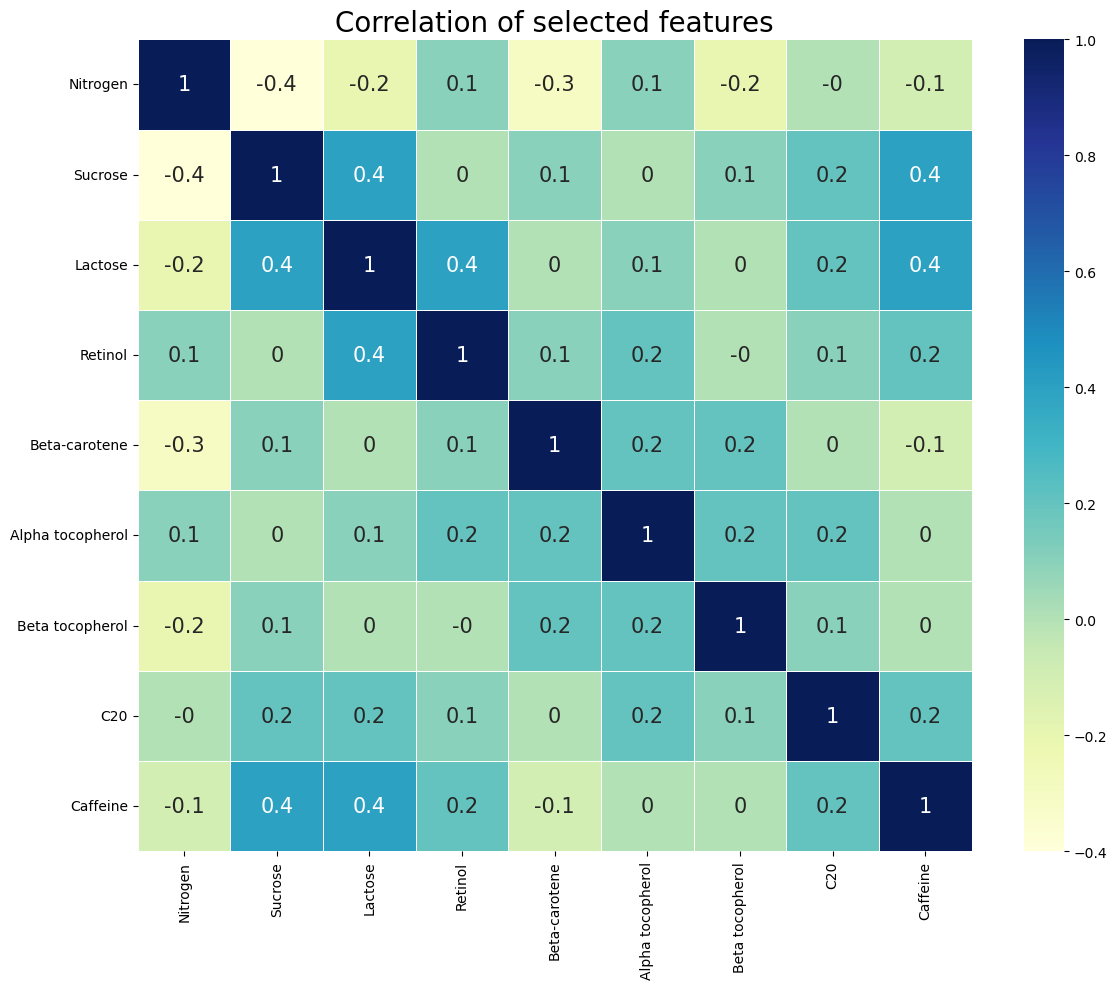

Index(['Energy with dietary fibre, equated', 'Nitrogen', 'Sucrose', 'Lactose',
       'Retinol', 'Beta-carotene', 'Alpha tocopherol', 'Beta tocopherol',
       'C20', 'Caffeine'],
      dtype='object')

In [6]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PowerTransformer
from sklearn.feature_selection import VarianceThreshold

def feature_select(df: pd.DataFrame):
    selector = VarianceThreshold()
    selector.fit(df)
    non_zero_indices = selector.get_support(indices=True)
    non_zero_features = df.columns[non_zero_indices]
    df = df[non_zero_features]
    df = normal_transform(df)

    # Feature Selection using Pearson correlation
    corr_matrix = df.corr()
    corr_matrix = corr_matrix.astype(float).round(1)
    new_corr_matrix = feature_remove(corr_matrix)
    corr_heatmap(new_corr_matrix)

    selected_features = new_corr_matrix.columns
    return selected_features

def normal_transform(df: pd.DataFrame):
    left_thres = -1
    right_thres = 1
    pt = PowerTransformer(method='yeo-johnson')
    for col in df.columns:
        skewness = df[col].skew()
        if skewness < left_thres or skewness > right_thres:
            df.loc[:, col] = pt.fit_transform(df.loc[:, col].values.reshape(-1, 1))
    return df

def corr_heatmap(corr_matrix: pd.DataFrame):
    corr_matrix = corr_matrix.drop('Energy with dietary fibre, equated', axis=0)
    corr_matrix = corr_matrix.drop('Energy with dietary fibre, equated', axis=1)
    plt.subplots(figsize=(12, 10))
    sns.heatmap(corr_matrix, annot=True, cmap="YlGnBu", linewidths=.5, annot_kws={"fontsize":15})
    plt.title('Correlation of selected features', fontsize=20)
    plt.tight_layout()
    plt.show()

def feature_remove(corr_matrix: pd.DataFrame):
    thres0 = 0.1
    thres1 = 0.5
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    to_drop = []
    for col in upper.columns:
        if abs(upper[col]['Energy with dietary fibre, equated']) <= thres0 \
           or any(abs(upper[col]) >= thres1):
            to_drop.append(col)
    corr_matrix = corr_matrix.drop(corr_matrix[to_drop], axis=0)
    corr_matrix = corr_matrix.drop(corr_matrix[to_drop], axis=1)
    return corr_matrix

selected_features = feature_select(train_data)
selected_features

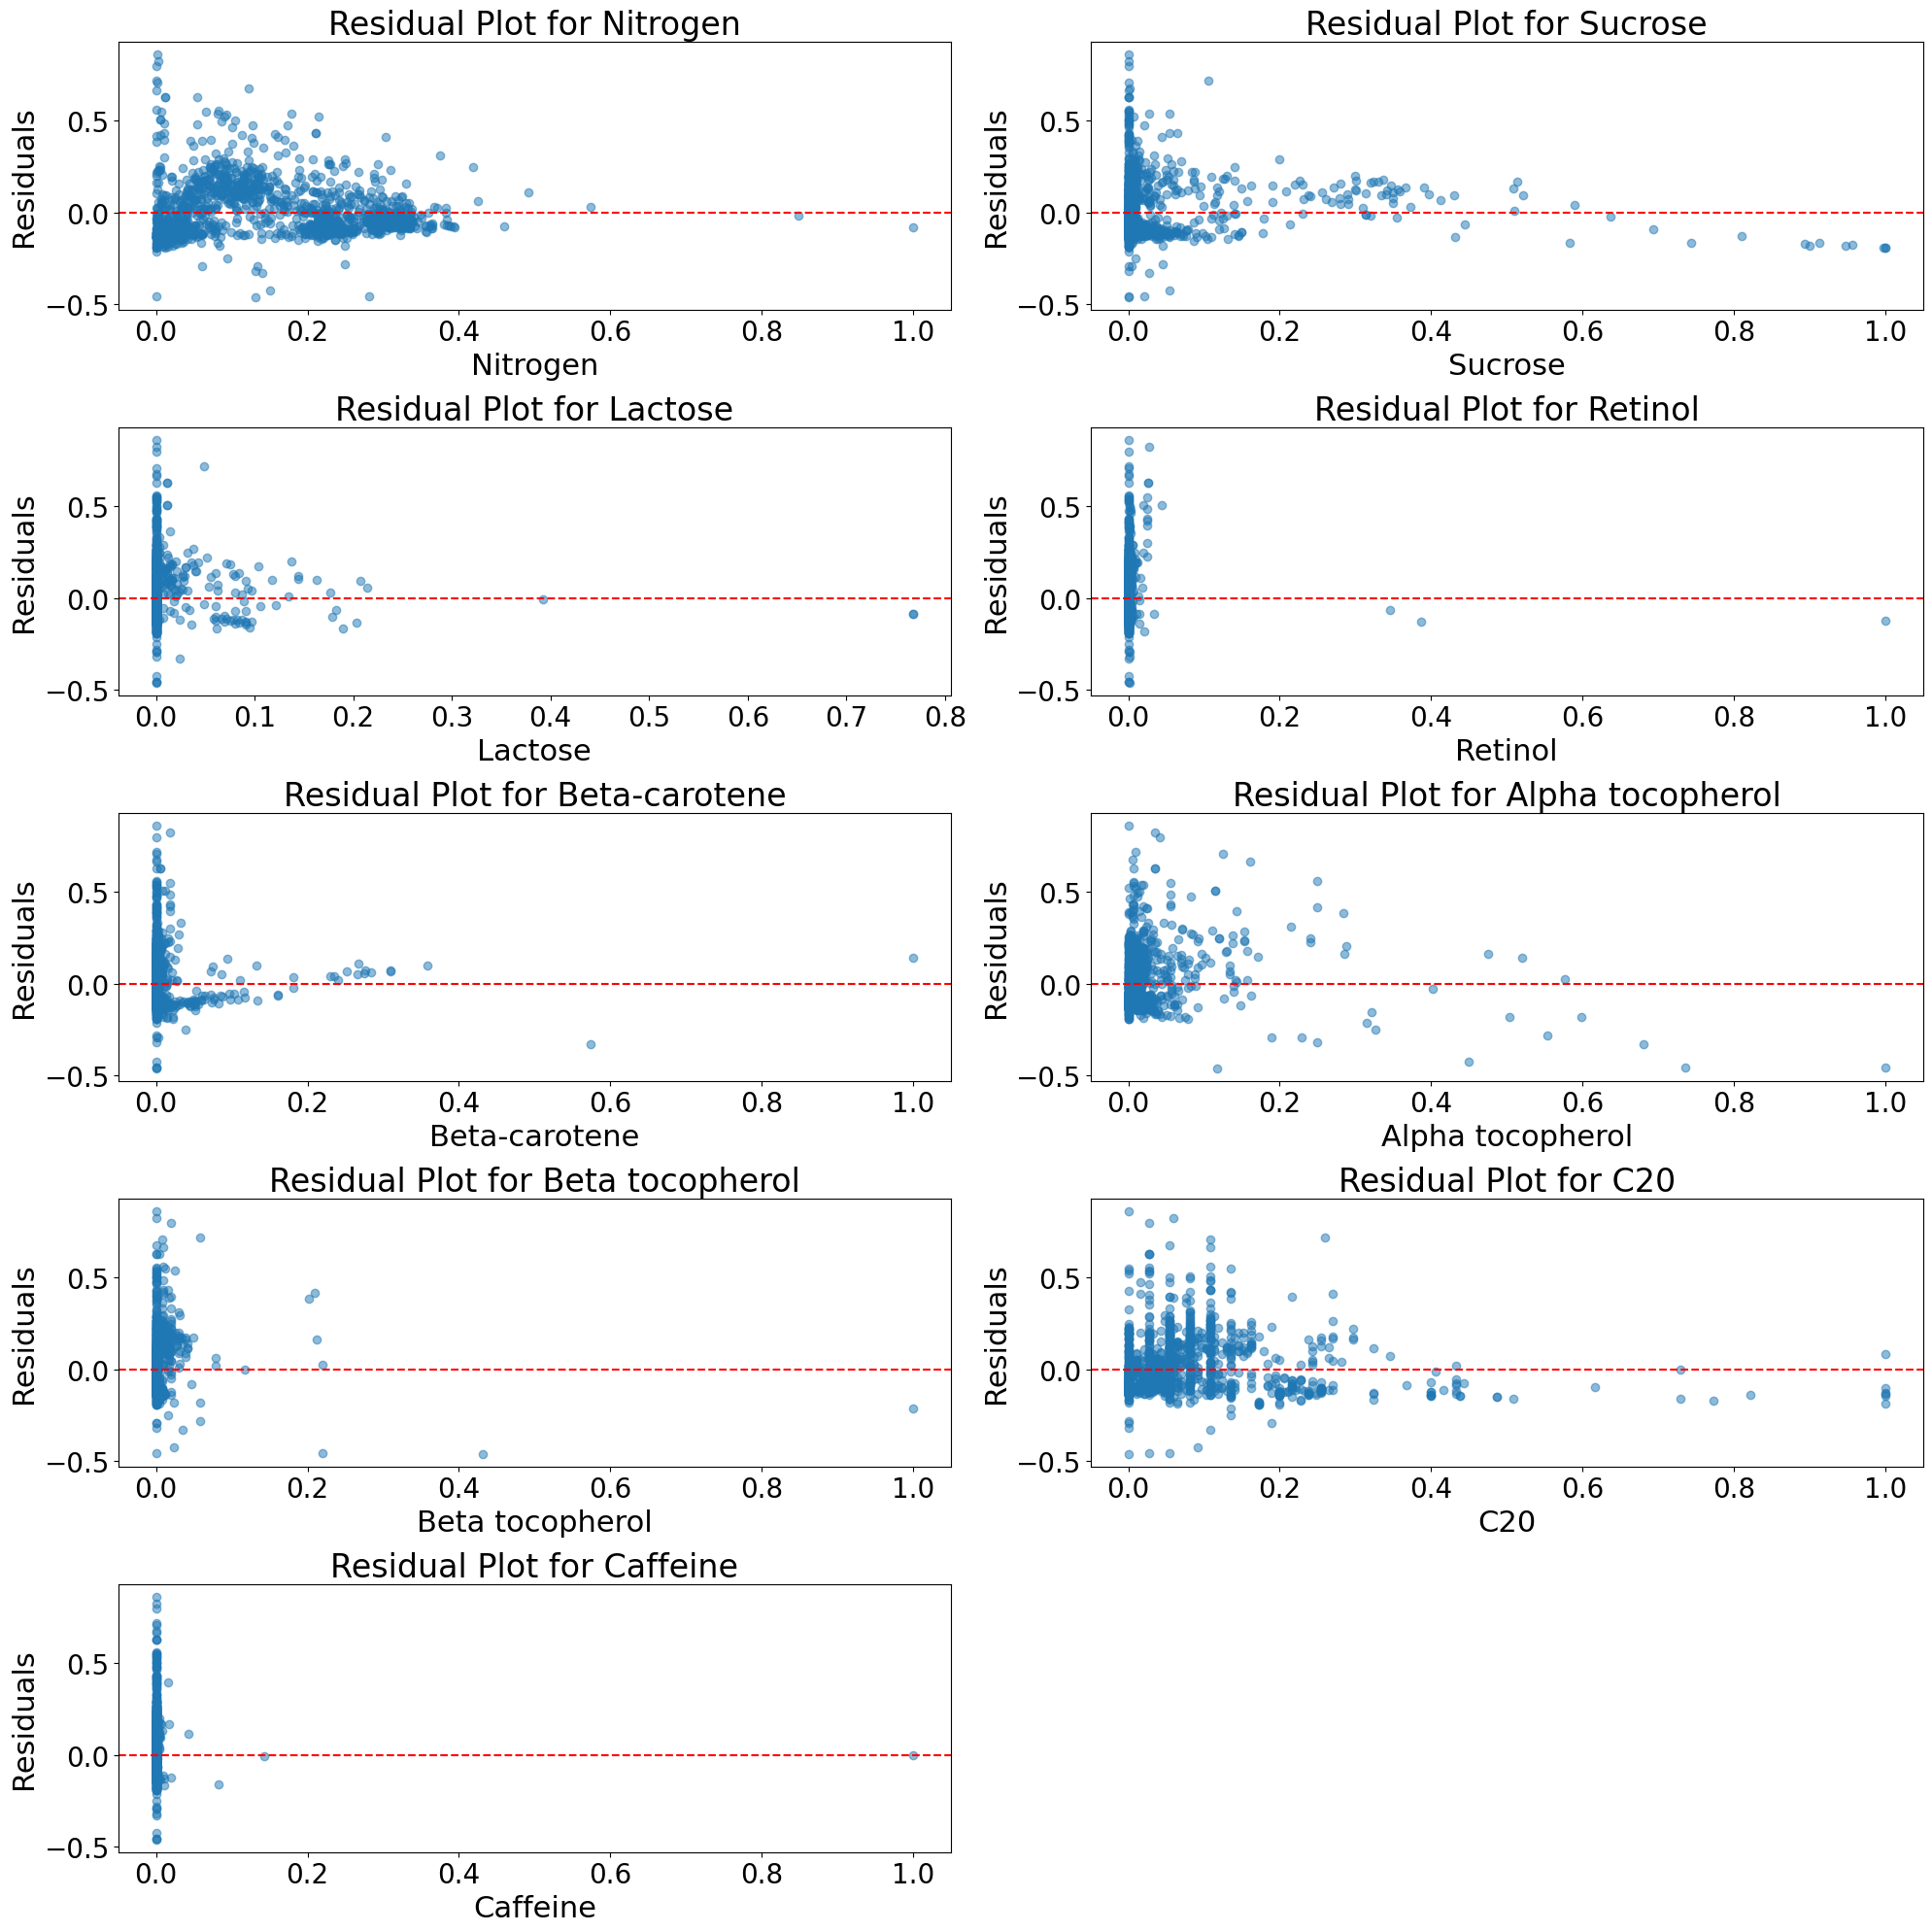

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

X_train = train_data[selected_features].drop('Energy with dietary fibre, equated', axis=1)
y_train = train_data['Energy with dietary fibre, equated']
X_test = test_data[selected_features].drop('Energy with dietary fibre, equated', axis=1)
y_test = test_data['Energy with dietary fibre, equated']

def linear_model(X_train: pd.DataFrame, y_train: pd.DataFrame, X_test: pd.DataFrame, y_test: pd.DataFrame): 
    model = LinearRegression()
    model.fit(X_train, y_train)
    intercept = model.intercept_
    coefficients = model.coef_
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    scaled_mse = mean_squared_error(y_test, y_test_pred)
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)

    if n_fold == 1:
        residuals = y_train - y_train_pred
        residual_plot(X_train, residuals)

    return intercept, coefficients, [r2_train, r2_test, scaled_mse]

def residual_plot(X, residuals):
    num_cols = X.shape[1]
    size = (num_cols + 1) // 2
    fig, axs = plt.subplots(size, min(num_cols, 2), figsize=(20, 20))
    axs = axs.ravel()
    for i, col in enumerate(X.columns):
        axs[i].scatter(X[col], residuals, alpha=0.5)
        axs[i].axhline(y=0, color='red', linestyle='--')
        axs[i].set_xlabel(col, fontsize=22)
        axs[i].set_ylabel('Residuals', fontsize=22)
        axs[i].set_title(f'Residual Plot for {col}', fontsize=28)
        axs[i].tick_params(axis='both', labelsize=20)
        axs[i].title.set_size(24)
    for j in range(num_cols, size*2):
        fig.delaxes(axs[j])
    plt.tight_layout()

intercept, coefficients, scores = linear_model(X_train, y_train, X_test, y_test)
intercept_list.append(intercept)
coefficients_list.append(coefficients)
linear_scores_list.append(scores)

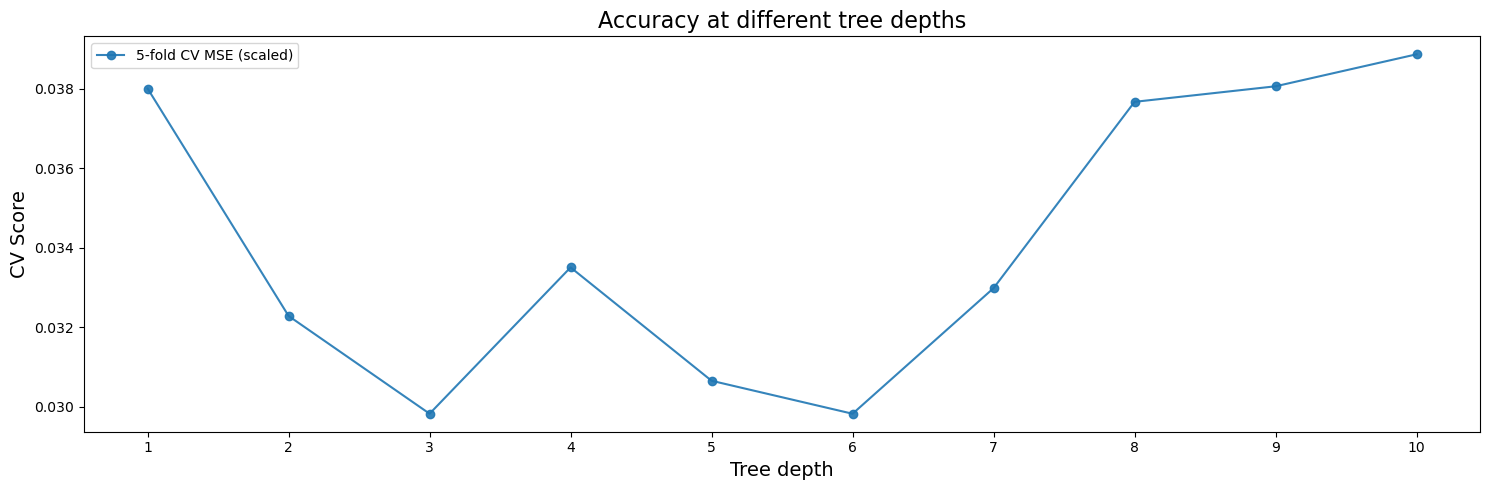

In [8]:
from sklearn.tree import DecisionTreeRegressor

#Find an optimal depth for the decision tree by plotting accuracy at different depths
def optimal_tree_depth(X, y):
    cv_mean = []
    depths = range(1, 11)
    for depth in depths:
        tree_model = DecisionTreeRegressor(max_depth=depth)
        mse_scores = -cross_val_score(tree_model, X, y, cv=5, scoring='neg_mean_squared_error')
        cv_mean.append(mse_scores.mean())
    cv_scores_mean = np.array(cv_mean)
    plot_tree_depth(depths, cv_scores_mean)

def plot_tree_depth(depths, cv_scores_mean):
    fig, ax = plt.subplots(1, 1, figsize=(15, 5))
    ax.plot(depths, cv_scores_mean, '-o', label='5-fold CV MSE (scaled)', alpha=0.9)
    ylim = plt.ylim()
    ax.set_title('Accuracy at different tree depths', fontsize=16)
    ax.set_xlabel('Tree depth', fontsize=14)
    ax.set_ylabel('CV Score', fontsize=14)
    ax.set_ylim(ylim)
    ax.set_xticks(depths)
    ax.legend()
    plt.tight_layout()
    plt.show()

optimal_tree_depth(X_train, y_train)

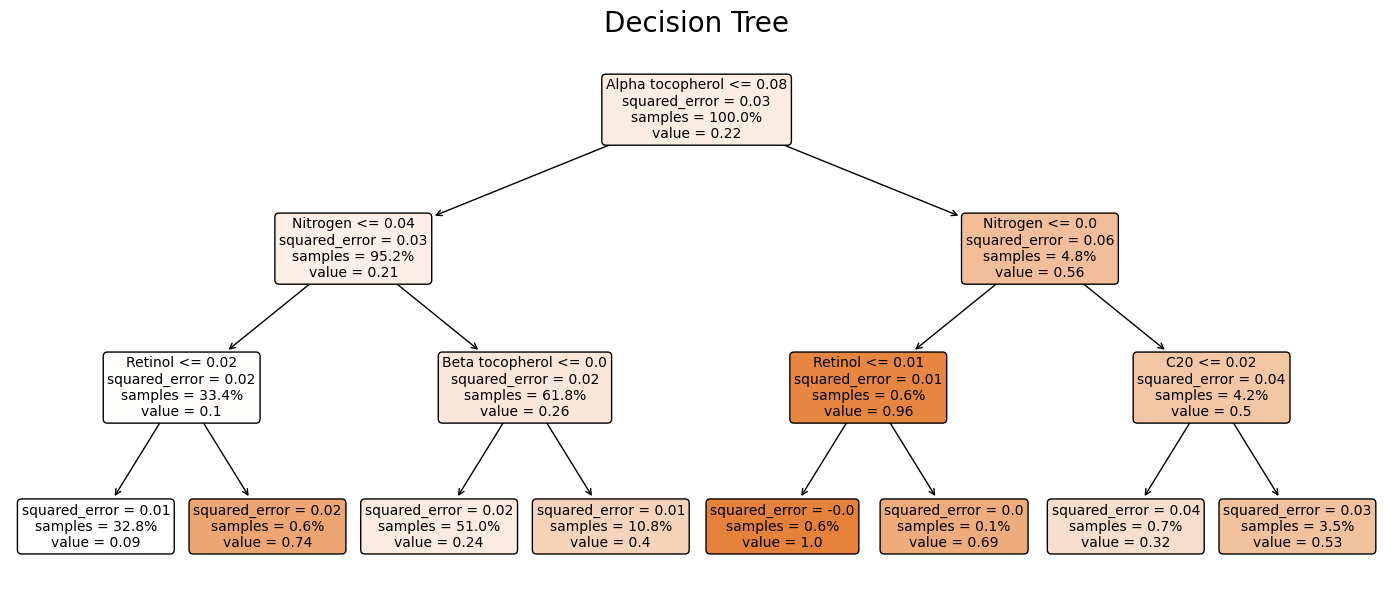

In [9]:
from sklearn.tree import plot_tree
from sklearn.tree import export_text

def tree_model(X_train: pd.DataFrame, y_train: pd.DataFrame, X_test: pd.DataFrame, y_test: pd.DataFrame, n_fold): 
    reg_tree = DecisionTreeRegressor(max_depth=3)
    reg_tree.fit(X_train, y_train)
    y_test_pred = reg_tree.predict(X_test)
    scaled_mse = mean_squared_error(y_test, y_test_pred)

    if n_fold == 1:
        plt.figure(figsize=(14, 6))
        plot_tree(reg_tree, feature_names=X_train.columns, filled=True, rounded=True, fontsize=10, proportion=True, precision=2)
        plt.title('Decision Tree', fontsize=20)
        plt.tight_layout(pad=0.5)
        plt.show()

    return scaled_mse

tree_scaled_mse = tree_model(X_train, y_train, X_test, y_test, n_fold)
tree_mse_list.append(tree_scaled_mse)


In [10]:
#Perform the remaining 9 folds and calculate goodness of fit measures for linear model and decision tree
while n_fold < 10:
    n_fold += 1
    train_index, test_index = next(folds)
    train_data = df.iloc[train_index].dropna(how='all')
    test_data = df.iloc[test_index].dropna(how='all')

    train_data, test_data = drop_null(train_data, test_data, n_fold)
    train_data = impute(train_data)
    test_data = impute(test_data)

    X_train = train_data[list(selected_features)].drop('Energy with dietary fibre, equated', axis=1)
    y_train = train_data['Energy with dietary fibre, equated']
    X_test = test_data[selected_features].drop('Energy with dietary fibre, equated', axis=1)
    y_test = test_data['Energy with dietary fibre, equated']

    intercept, coefficients, scores = linear_model(X_train, y_train, X_test, y_test)
    intercept_list.append(intercept)
    coefficients_list.append(coefficients)
    linear_scores_list.append(scores)

    tree_scaled_mse = tree_model(X_train, y_train, X_test, y_test, n_fold)
    tree_mse_list.append(tree_scaled_mse)

goodness_of_fit_df = pd.DataFrame(columns=['10-fold CV Train R-squared',
                                    '10-fold CV Test R-squared',
                                    '10-fold CV MSE (scaled)'])

avg_intercept = np.array(intercept_list).mean()
avg_coefficients = np.mean(coefficients_list, axis=0)
avg_linear_scores = np.mean(linear_scores_list, axis=0)

goodness_of_fit_df.loc[f'Linear model'] = np.round(avg_linear_scores.astype(float), 3)
print(f'Linear model\'s avg line intercept: ', avg_intercept)
print(f'Model model\'s avg line coefficients: ', avg_coefficients)

avg_tree_mse = np.array(tree_mse_list).mean()
goodness_of_fit_df.loc['Regression Tree'] = ['n/a', 'n/a', np.round(avg_tree_mse.astype(float), 3)]

goodness_of_fit_df     

Linear model's avg line intercept:  0.13816018838836885
Model model's avg line coefficients:  [ 0.32915777  0.49692218  0.3890939   0.1617468  -0.63322836  1.19077068
  0.77927869  0.05649815 -0.04647903]


,10-fold CV Train R-squared,10-fold CV Test R-squared,10-fold CV MSE (scaled)
Linear model,0.342,0.292,0.025
Regression Tree,n/a,n/a,0.020
